## **Domicílios com rendimento per-capita de até 1 salário mínimo**

#### Este notebook apresenta a porcentagem de domicílio que vivem com uma renda de até um salário mínimo por morador, ordenado por município.

In [1]:
# Importar packages
from DadosAbertosBrasil import ibge
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = ibge.sidra(
    tabela = 3261,
    periodos = 2010,
    variaveis = 1000096,
    localidades = {6: 'all'},
    classificacoes = {386: [9692, 9681, 9682, 9683]}
)

df = df.pivot(
    index = 'Município',
    columns = 'Classes de rendimento nominal mensal domiciliar per capita',
    values = 'Valor'
)

df = df[[
    'Sem rendimento',
    'Até 1/4 de salário mínimo',
    'Mais de 1/2 a 1 salário mínimo',
    'Mais de 1/4 a 1/2 salário mínimo'
]].replace('-',0).astype(float)

df['Mais de 1 salário mínimo'] = 100 - df.sum(axis=1)
df.sort_values(
    'Mais de 1 salário mínimo',
    ascending = False,
    inplace = True
)

df.sample(10)

Classes de rendimento nominal mensal domiciliar per capita,Sem rendimento,Até 1/4 de salário mínimo,Mais de 1/2 a 1 salário mínimo,Mais de 1/4 a 1/2 salário mínimo,Mais de 1 salário mínimo
Município,,,,,
Água Boa - MT,3.22,4.34,33.81,15.29,43.34
Carneirinho - MG,2.40,3.57,40.64,15.25,38.14
Primeiro de Maio - PR,2.65,4.81,39.82,17.96,34.76
Jaguaripe - BA,4.17,40.25,23.10,25.65,6.83
Breu Branco - PA,6.17,32.43,21.71,29.49,10.20
Barra de São Miguel - PB,4.10,23.70,33.68,27.19,11.33
Paraí - RS,0.93,0.61,29.50,4.85,64.11
Maracaju - MS,2.76,5.74,33.35,15.92,42.23
Cruzeiro da Fortaleza - MG,1.37,9.98,38.33,21.90,28.42


#### 1. Preparar DataFrame

In [3]:
# Top 20
top = df[:20].cumsum(axis=1)
top

Classes de rendimento nominal mensal domiciliar per capita,Sem rendimento,Até 1/4 de salário mínimo,Mais de 1/2 a 1 salário mínimo,Mais de 1/4 a 1/2 salário mínimo,Mais de 1 salário mínimo
Município,,,,,
Westfália - RS,0.00,1.15,17.76,19.49,100.0
Carlos Barbosa - RS,0.33,0.65,18.28,20.90,100.0
São Caetano do Sul - SP,2.23,2.82,17.52,21.10,100.0
Balneário Camboriú - SC,2.47,3.01,18.34,21.69,100.0
Águas de São Pedro - SP,1.92,2.93,19.60,23.94,100.0
Florianópolis - SC,2.37,3.26,19.54,24.20,100.0
Brusque - SC,1.79,2.23,21.16,24.35,100.0
Blumenau - SC,1.78,2.31,20.99,24.53,100.0
Bento Gonçalves - RS,1.07,1.75,20.85,24.94,100.0


In [4]:
# Bottom 20
bottom = df[-20:].cumsum(axis=1)
bottom

Classes de rendimento nominal mensal domiciliar per capita,Sem rendimento,Até 1/4 de salário mínimo,Mais de 1/2 a 1 salário mínimo,Mais de 1/4 a 1/2 salário mínimo,Mais de 1 salário mínimo
Município,,,,,
Icatu - MA,11.05,58.63,75.42,96.39,100.0
Madeiro - PI,12.04,56.27,72.75,96.40,100.0
Santa Filomena do Maranhão - MA,12.90,61.02,77.52,96.47,100.0
Bagre - PA,3.40,56.27,68.75,96.48,100.0
Satubinha - MA,16.62,64.88,76.09,96.51,100.0
Milagres do Maranhão - MA,4.61,57.42,74.15,96.61,100.0
Cachoeira do Piriá - PA,7.73,63.32,74.26,96.62,100.0
Santana do Maranhão - MA,7.71,55.38,72.89,96.67,100.0
Cajapió - MA,12.51,60.35,75.72,96.69,100.0


#### 2. Plottar gráfico

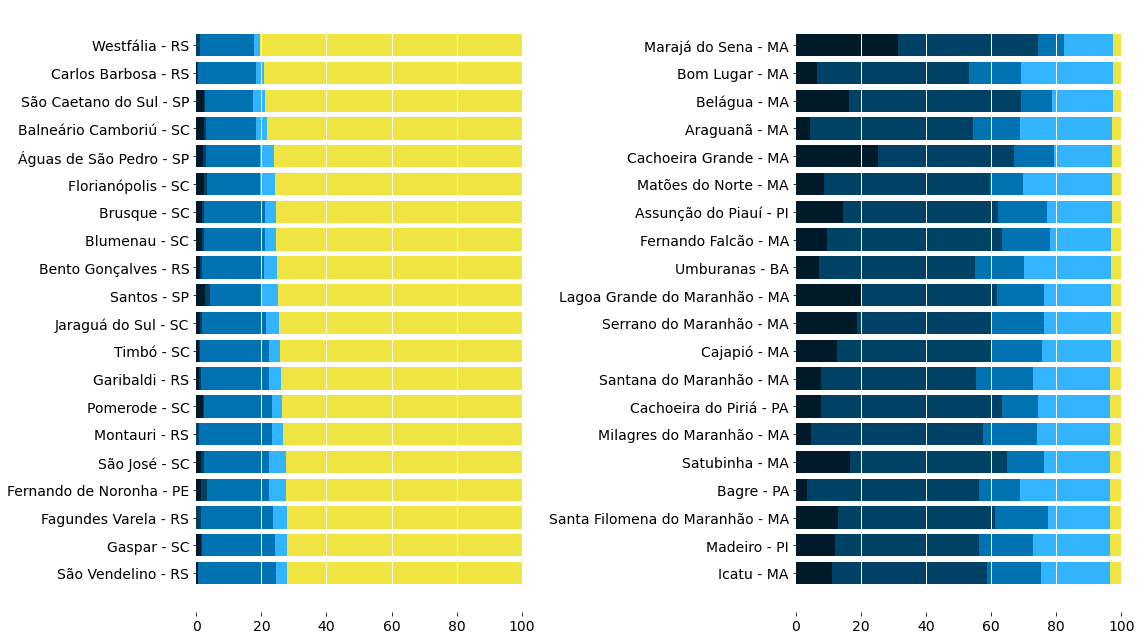

In [5]:
# Remover spines
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

# Escolher cores das categorias
colors = ['#F0E442', '#33B4FF', '#0072B2', '#004166', '#001A29']

# Criar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

# Plottar gráfico da esquerda
for col, color in zip(reversed(list(top.columns)), colors):
    ax1.barh(top.index, top[col], color=color)
ax1.invert_yaxis()
    
# Plottar gráfico da direita
for col, color in zip(reversed(list(top.columns)), colors):
    ax2.barh(bottom.index, bottom[col], color=color)

# Plottar linhas verticais de referência
for line in range(20,81,20):
    ax1.axvline(line, c='white', lw=1)
    ax2.axvline(line, c='white', lw=1)
   
# Alterar tamanho da fonte
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Formatar margens
fig.tight_layout()